### Direct Marketing Adaboost Classifier

To build an Adaboost and Gradient Boosting classifier to classify customers as Good/Bad based on amount spent. Good - if amount spent is >average amount spent

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import os
os.getcwd()

'C:\\Users\\Varun R Bhat\\Downloads\\Jigsaw\\Direct_Marketing_Data_Set'

In [2]:
dm = pd.read_csv('directmarketing.csv',sep=',',header=0)
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [3]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    1000 non-null int64
Cust_Id        1000 non-null int64
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [4]:
# #--According to the marketer customer who spends more than the average spend is considered as Good--#
# Target variable
dm['Target'] = (dm.AmountSpent>dm.AmountSpent.mean()).map({True:1,False:0})
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [5]:
# Missing values
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
Target           0
dtype: int64

In [6]:
# Create separate category 'Missing' for History 
dm['History'] = dm.History.replace({np.nan:'Missing'})
print(dm.History.unique())
print(dm.isnull().sum())
dm.head()

['High' 'Low' 'Medium' 'Missing']
Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
Cust_Id        0
Target         0
dtype: int64


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [7]:
# Converting Children and Catalogs into categorical variables
dm['Children'] = dm.Children.astype('category')
dm['Catalogs'] = dm.Catalogs.astype('category')
dm.dtypes

Age              object
Gender           object
OwnHome          object
Married          object
Location         object
Salary            int64
Children       category
History          object
Catalogs       category
AmountSpent       int64
Cust_Id           int64
Target            int64
dtype: object

In [8]:
# Target variable and Predictor variables
y = dm['Target']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [9]:
X = dm.drop(['History','AmountSpent','Cust_Id','Target'],axis=1)
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs
0,Old,Female,Own,Single,Far,47500,0,6
1,Middle,Male,Rent,Single,Close,63600,0,6
2,Young,Female,Rent,Single,Close,13500,0,18
3,Middle,Male,Own,Married,Close,85600,1,18
4,Middle,Female,Own,Single,Close,68400,0,12


In [10]:
# Dummy variables
X = pd.get_dummies(X)
X.head()

,Salary,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Children_0,Children_1,Children_2,Children_3,Catalogs_6,Catalogs_12,Catalogs_18,Catalogs_24
0,47500,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0
1,63600,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0
2,13500,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0
3,85600,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,68400,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
clf = AdaBoostClassifier(n_estimators=20, random_state=200)
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=200)

In [30]:
clf.score(X_test,y_test)

0.8533333333333334

In [21]:
# Grid search CV 
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(clf,param_grid={'n_estimators':list(range(20,200,20))},cv=5)
mod.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=20,
                                          random_state=200),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
mod.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=200)

In [31]:
# n_estimators=20 is the best estimator
# AUC
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.9271175937842605

In [32]:
y_pred=clf.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[165,  24],
       [ 20,  91]], dtype=int64)

In [33]:
clf.feature_importances_

array([0.6 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.1 , 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.05])

In [34]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [35]:
imp_feat.sort_values(ascending=False)

Salary             0.60
Children_0         0.10
Children_1         0.05
Location_Far       0.05
Catalogs_24        0.05
Children_3         0.05
Catalogs_6         0.05
Catalogs_12        0.05
Children_2         0.00
Location_Close     0.00
Catalogs_18        0.00
Married_Married    0.00
OwnHome_Rent       0.00
OwnHome_Own        0.00
Gender_Male        0.00
Gender_Female      0.00
Age_Young          0.00
Age_Old            0.00
Age_Middle         0.00
Married_Single     0.00
dtype: float64

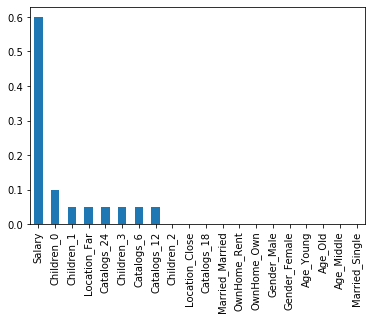

In [37]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

### Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
clf2 = GradientBoostingClassifier(n_estimators=20, random_state=200)
clf2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
clf2.score(X_test,y_test)

0.8266666666666667

In [42]:
# Grid search CV 
from sklearn.model_selection import GridSearchCV
mod2 = GridSearchCV(clf2,param_grid={'n_estimators':list(range(20,200,20))},cv=5)
mod2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=20,
                                                  n_iter_no_change=None,
                                                  presort='

In [43]:
mod2.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='auto',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [44]:
# n_estimators=80
clf2 = GradientBoostingClassifier(n_estimators=80, random_state=200)
clf2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='auto',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
clf2.score(X_test,y_test)

0.8566666666666667

In [46]:
# n_estimators=80 is the best estimator
# AUC
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1])

0.93669860336527

In [48]:
y_pred2=clf2.predict(X_test)
metrics.confusion_matrix(y_test,y_pred2)

array([[166,  23],
       [ 20,  91]], dtype=int64)

In [49]:
clf2.feature_importances_

array([6.49799953e-01, 9.25914213e-04, 4.02814026e-04, 4.74535055e-03,
       8.25014664e-04, 1.75524041e-03, 4.08429614e-03, 5.15372931e-03,
       4.43009040e-04, 2.85624859e-04, 3.07601581e-02, 3.32720456e-02,
       2.73730648e-02, 9.60417963e-04, 2.90354859e-02, 2.84972782e-02,
       9.94862343e-02, 1.48349598e-02, 1.69763009e-02, 5.03831080e-02])

In [50]:
imp_feat=pd.Series(clf2.feature_importances_,index=X.columns.tolist())

In [51]:
imp_feat.sort_values(ascending=False)

Salary             0.649800
Catalogs_6         0.099486
Catalogs_24        0.050383
Location_Far       0.033272
Location_Close     0.030760
Children_2         0.029035
Children_3         0.028497
Children_0         0.027373
Catalogs_18        0.016976
Catalogs_12        0.014835
OwnHome_Rent       0.005154
Age_Young          0.004745
OwnHome_Own        0.004084
Gender_Male        0.001755
Children_1         0.000960
Age_Middle         0.000926
Gender_Female      0.000825
Married_Married    0.000443
Age_Old            0.000403
Married_Single     0.000286
dtype: float64

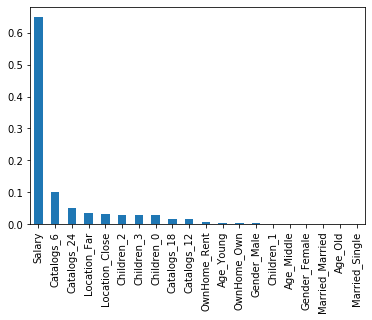

In [53]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [68]:
##Partial Dependence Plot - to determine the direction of impact of predictor on the target variable, computationally expensive
from sklearn.inspection import plot_partial_dependence

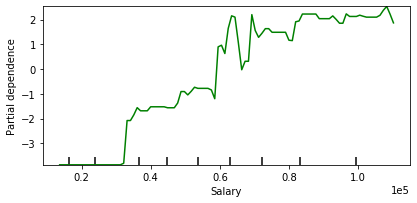

In [78]:
plot_partial_dependence(clf2, X,[0],feature_names=X.columns.tolist())